In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

directory = '/home/nathan/Documents/FYP_code/LSTM1_guillermo/grouping_2/'
with open(directory + 'labels/name_of_labels_original.txt') as f:
    name_labels = np.asarray([word for line in f for word in line.split()])

** KMEANS from here **

In [22]:
n_latent = 8 #change here to load new z
location = '/home/nathan/Documents/FYP_code/LSTM1_guillermo/VAE_embedding/z_' + str(n_latent)+'.npy'
z = np.load(location) #numpy array
print(z.shape)

location = '/home/nathan/Documents/FYP_code/LSTM1_guillermo/VAE_embedding/true_labels' + '.npy'
true_labels = np.load(location) #numpy array

(595, 8)


In [36]:
from sklearn.cluster import KMeans
K=3
kmeans = KMeans(n_clusters=K)
kmeans.fit(z)
y_kmeans = kmeans.predict(z) #used to predict what cluster you belong to

In [77]:
#Display confidence level bar histogram 
def confidence_probability (scores, g_labels, cluster_number):
    
    format_scores = scores - np.amin(scores)
    format_scores = format_scores / np.amax(format_scores)
    #y = format_scores #probabilities made from normalising on this 1 score (not on the 569 scores)
    y = scores
        
    x = range(len(scores)) #as much scores as there is in y (45)
    
    plt.figure(figsize=(20,4))
    
    barlist = plt.bar(x,y, width=0.7)
    
    num_classes = len(g_labels)

    #import randomcolor
    #colors = randomcolor.RandomColor().generate(count=num_classes) #as many group or actions
    colors = ['#5fdda2', '#b68fd8', '#924fbc', '#cd89e5', '#edffaf', '#ccedff',
              '#6cd86f', '#3a8dc1', '#13d343', '#fca105', '#7ae8cc', '#d341af', 
              '#2b90d8', '#d12d1b', '#e5e37e', '#f9ad84', '#eda371', '#d1a570', 
              '#915251', '#4412a8', '#5c359e', '#0cad8a', '#1ebcaa', '#a179ce', 
              '#6c52c9', '#0f991d', '#e8772c', '#574bf4', '#e84762', '#fcf8ab', 
              '#70d39e', '#a3bc01', '#caed93', '#d99aed', '#dd77d8', '#4bd15a', 
              '#dda58b', '#f2a4e2', '#f7b2c6', '#24ada1', '#f79f2c', '#929cf4', 
              '#230b7a', '#37efc4', '#778bef']
    
    for i in range(len(barlist)): barlist[i].set_color(colors[i])
    
    plt.title('Cluster '+str(cluster_number)+'/'+str(K)+' of size '+str()+'/595', fontsize=18)
    
    plt.xticks(x, g_labels, rotation=90, fontsize=18)
    plt.ylabel('Number of occurences')
    ax = plt.gca()
    #ax.yaxis.grid(linestyle='dashed', color='gray')
    
    plt.show()

[1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 2 0 1 1 1 1 1 1 1 2 0 0 1 0 1 1 2 2 0 2
 0 1 1 2 2 1 1 2 0 2 0 2 1 0 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 2 2 1 1 1 2 1 1 1 1 2 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 2 0 2 2 2 1 1 1
 0 2 2 1 1 1 1 1 1 1 1 1 0 0 1 1 0 2 2 2 2 0 1 1 1 2 2 1 1 1 2 1 0 1 1 1 1
 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 2 1 1 2 1 1 2 1 2 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 0 1 1 2 2 1 1 2 2 2 2 1 0 1 1 1 1 1 1 0 0 2 2 0 1 2 2 2 2 1 0 0 1
 1 2 0 1 1 0 0 2 2 2 2 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 2 2 1 1 2
 1 1 2 2 2 2 1 1 1 1 1 0 0 0 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 0
 1 1 1 1 1 1 1 1 1 2 1 0 1 2 0 2 2 2 2 2 2 2 0 0 2 1 1 0 2 1 1 0 0 2 2 2 2
 2 2 1 2 1 1 2 0 0 2 0 2 2 1 1 0 0 0 0 1 1 2 1 2 0 2 1 1 1 2 2 2 2 1 2 2 2
 0 1 1 2 1 1 1 2 0 2 0 1 1 1 1 1 1 0 1 1 1 1 1 2 0 0 0 0 1 2 2 2 0 1 0 1 1
 1 1 1 1 1 1 1 0 2 0 0 1 2 0 0 0 2 2 1 1 0 1 0 0 0 2 2 1 0 0 2 2 0 1 2 1 2
 0 2 1 1 1 0 0 0 0 1 1 1 1 2 2 1 1 1 0 1 1 0 0 2 1 1 1 2 2 1 2 2 2 2 1 1 1
 2 1 1 1 1 1 0 0 0 1 1 1 

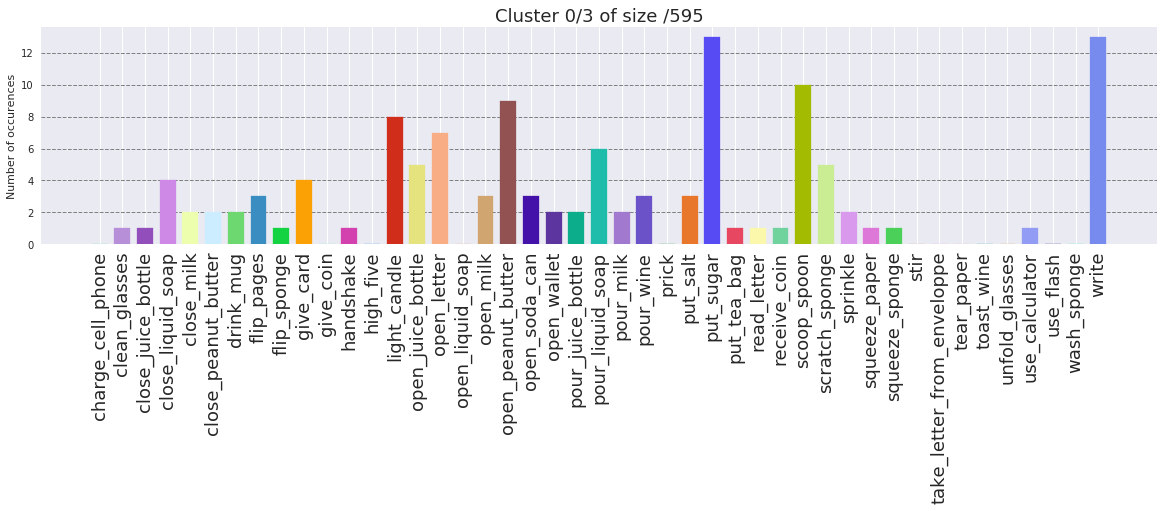

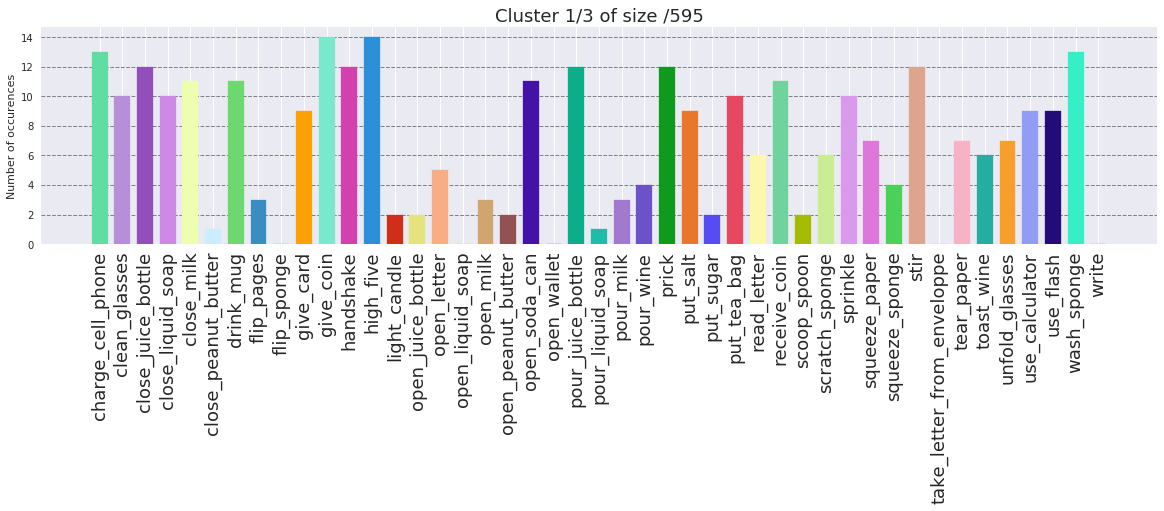

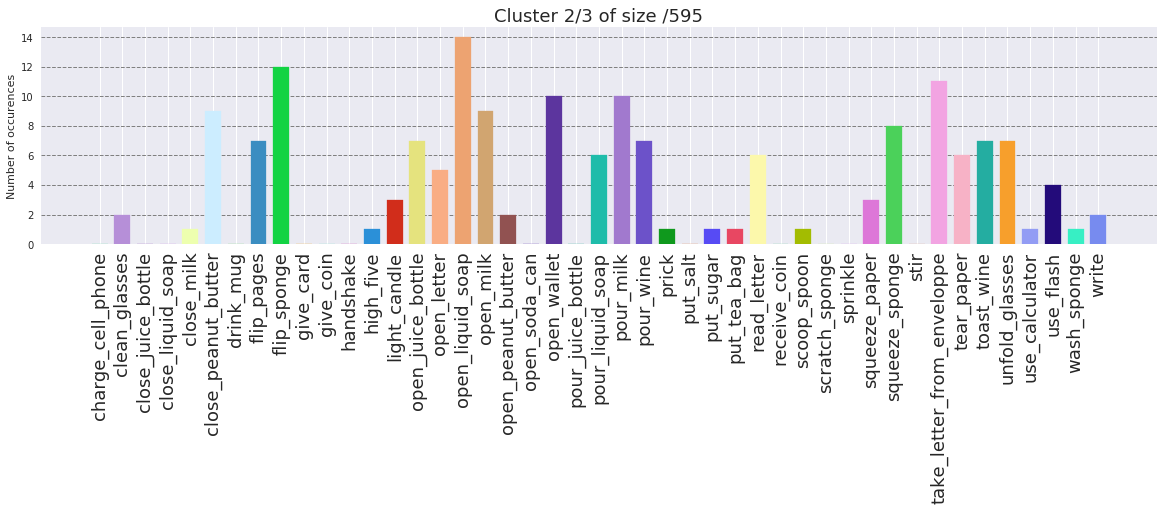

In [78]:
print(y_kmeans)
# know each cluster number is different from label number...
#need to build a function to visualize as a graph how much data points of each action class is in a cluster.
#Plot all graph clusters and see if there is a differentiation that happens
#Normalise clusters since they have different sizes -> or better, normalize on the percentage it holds of each actions
#don't hesitate on optimising the kmeans if results are fucked

for cluster_number in range(K):
    idx = np.where(y_kmeans == cluster_number) #idx in y_kmeans of points inside this cluster
    actions = true_labels[idx] #action labels of each of those points
    unique, counts = np.unique(actions, return_counts=True) #count number of occurences of each actions in the cluster
    scores = np.zeros(45) #prepare for easy hand over to a graph
    scores[unique] = counts
    confidence_probability (scores, name_labels, cluster_number)